# <center> Pacmann Final Project Statistics for Business : Salaries of employees prediction

## <center> Balqis Dwian Fitri Zamzami - ADS Batch 13 [TTS Batch 3]

### Import Libraryˎˊ˗ ✰

In [54]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold

### Data Preprocessingˎˊ˗ ✰

**View Data**

In [55]:
df = pd.read_csv("SalaryData.csv")
df.rename(columns = {'Education Level':'EducationLevel', 'Years of Experience':'YearsOfExperience'}, inplace=True)
df.head()

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Handling Missing Value**

In [56]:
df.isna().sum()

Age                  2
Gender               2
EducationLevel       2
Job Title            2
YearsOfExperience    2
Salary               2
dtype: int64

In [57]:
df[df["Age"].isna()]

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df = df.dropna()

In [59]:
df.isna().sum()

Age                  0
Gender               0
EducationLevel       0
Job Title            0
YearsOfExperience    0
Salary               0
dtype: int64

**Handling Duplicate Data**

In [60]:
df.duplicated().sum()

49

In [61]:
df[df.duplicated(keep=False)]

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
140,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
210,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
211,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
...,...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [62]:
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [63]:
df

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


### Statistical Testˎˊ˗ ✰

**Description of Data**

In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
YearsOfExperience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [65]:
df["Gender"].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

In [66]:
df["EducationLevel"].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: EducationLevel, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    object 
 2   EducationLevel     324 non-null    object 
 3   Job Title          324 non-null    object 
 4   YearsOfExperience  324 non-null    float64
 5   Salary             324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


**Correlation of Numerical Variables**

In [68]:
df[["Age","YearsOfExperience", "Salary"]].corr()

,Age,YearsOfExperience,Salary
Age,1.000000,0.979192,0.916543
YearsOfExperience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


The correlation among age, duration of work experience, and salary yields a positive outcome and demonstrates a strong correlation.

**Average salary in each categorical variables**

In [69]:
# SALARY VS GENDER

df.groupby("Gender")["Salary"].mean()

Gender
Female     96136.363636
Male      103472.647059
Name: Salary, dtype: float64

In [70]:
# SALARY VS EDUCATION LEVEL

df.groupby("EducationLevel")["Salary"].mean()

EducationLevel
Bachelor's     73902.356021
Master's      127912.087912
PhD           158095.238095
Name: Salary, dtype: float64

- The average salary of men is greater than the average salary of women.
- Average salaries increase with higher levels of education.

**Numerical Variables with Each Categorical Variable**

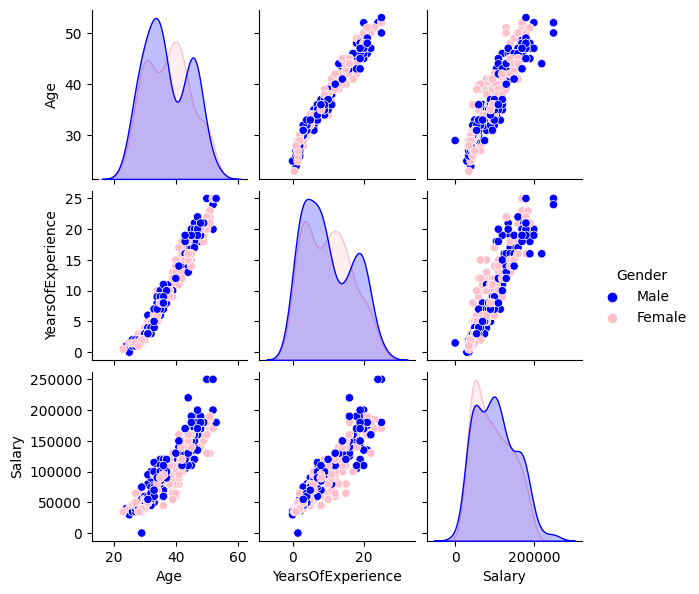

In [71]:
colors = ["blue", "pink"]
sns.set_palette(sns.color_palette(colors))

sns.pairplot(data=df, hue="Gender", height=2)
plt.show()

- The longer an employee's work experience, the higher his or her salary.
- The older a person is, the more work experience they have.
- Gender does not have a significant impact on salary.

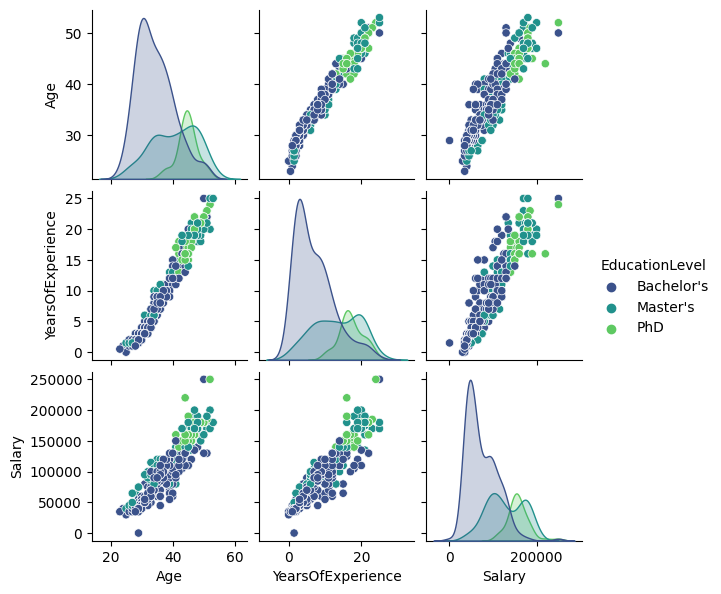

In [72]:
sns.pairplot(data=df, hue="EducationLevel", height=2, palette="viridis")

- The higher the level of education, the higher the salary.
- A high level of education tends to be possessed by someone with an older age.
- A high level of education tends to be possessed by someone with a high length of work experience.

**Hypothesis**

$H_0$: The average male salary is equal to the average female salary.
$$ H_0:\mu_A = \mu_B $$

$H_1$: Average male salary is greater than average female salary.
$$ H_1:\mu_A > \mu_B $$

In [73]:
# Count the number of male and female data
df.groupby("Gender")["Salary"].mean()

Gender
Female     96136.363636
Male      103472.647059
Name: Salary, dtype: float64

The average male salary is greater than the average female salary.

Since the standard deviation of the population was unknown, a t-test was used.
Before using the t-test, a variance test was implemented.

In [74]:
# Male salary
df_male = df[df["Gender"]=="Male"]["Salary"].values

# Female salary
df_female = df[df["Gender"]=="Female"]["Salary"].values

# Variance
np.var(df_male), np.var(df_female)

(2571353207.6989617, 2097896989.374262)

It can be concluded that the variances are not equal.

In [75]:
from scipy import stats
result = stats.ttest_ind(a = df_male, 
                         b = df_female, 
                         equal_var=False, 
                         alternative = "greater")

result.pvalue

0.08675461782037655

In [76]:
result.statistic

1.364034982496829

In [77]:
# Determine the decision rule
sig = 0.10

if result.pvalue<sig:
    print("the null hypothesis is rejected")
else:
    print("the null hypothesis is not rejected")

the null hypothesis is rejected


There is enough proof that the average salaries of men and women are not the same.
The average salary of men is higher than the average salary of women.

**Degrees of Freedom**

In [78]:
df_data = len(df_male)+len(df_female)
df_data

324

In [79]:
sig = 0.1

# Create x values
x = np.arange(-4, 6, 0.001)
y_pdf = stats.t.pdf(x, df=df_data)

# Create figure using Plotly Express
fig = px.line(x=x, y=y_pdf, labels={'x': 't', 'y': 'density'})

# Add alpha region
x_alpha = np.arange(stats.t.ppf(1-sig, df=df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df=df_data)
fig.add_shape(
    type='rect',
    xref='x',
    yref='paper',
    x0=stats.t.ppf(1-sig, df=df_data),
    x1=4,
    y0=0,
    y1=1,
    fillcolor='red',
    opacity=0.35,
    layer='below',
    name='alpha region'
)

# Add p-value region
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df=df_data)
fig.add_shape(
    type='rect',
    xref='x',
    yref='paper',
    x0=result.statistic,
    x1=4,
    y0=0,
    y1=1,
    fillcolor='green',
    opacity=0.35,
    layer='below',
    name='p-value region'
)

# Add t-crit line
t_crit = np.round(stats.t.ppf(1-sig, df=df_data), 4)
fig.add_shape(
    type='line',
    xref='x',
    yref='paper',
    x0=t_crit,
    x1=t_crit,
    y0=0,
    y1=1,
    line=dict(color='red', width=2, dash='dash'),
    name='t-crit'
)

# Add t-stat line
fig.add_shape(
    type='line',
    xref='x',
    yref='paper',
    x0=result.statistic,
    x1=result.statistic,
    y0=0,
    y1=1,
    line=dict(color='green', width=2, dash='dash'),
    name='t-stat'
)

fig.update_layout(
    title=f't Distribution Plot with df = {df_data}\n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = {sig}',
    xaxis_title='t',
    yaxis_title='density',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    width=800  # Set the width of the plot
)

# Show the plot
fig.show()

**Confidence Level**

In [80]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=df_male),
                  d2 = DescrStatsW(data=df_female))

lower, upper = cm.tconfint_diff(alpha=sig,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -1535.8717753119818 16208.438620231766 ]


### Regression Modelˎˊ˗ ✰

In [81]:
# Delete the Job Title column because it will not be used

df.drop("Job Title", axis=1, inplace=True)
df.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0


In [82]:
# Check Education Level Data Content

df["EducationLevel"].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: EducationLevel, dtype: int64

In [83]:
# Check Gender Data Contents

df["Gender"].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

#### Change Data

Gender (binary):
Male = 0,
Female = 1

Education Level (ordinal):
Bachelor's = 0,
Master's = 1,
PhD = 2

In [84]:
df["EducationLevel"] = df["EducationLevel"].map({"Bachelor's":0,"Master's":1,"PhD":2})
df["Gender"] = df["Gender"].map({"Male":0,"Female":1})
df.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


### Single Predictor Modellingˎˊ˗ ✰

It shows a positive relationship, i.e. the longer the work experience, the higher the salary.
For longer work experience, the variation in salary tends to be greater.

In [85]:
def print_coef_std_err(results):
    """
    Extract and print the coefficients and standard errors from regression results.
    
    Parameters:
    results (statsmodels.regression.linear_model.RegressionResultsWrapper): Regression results object.
    """
    coef_std_err = results.params.to_frame(name='Coefficient')
    coef_std_err['Standard Error'] = results.bse
    return coef_std_err

In [86]:
### a. Fit Linear Regression - Using Horsepower Variable

# Create OLS model object
model = smf.ols("Salary ~ YearsOfExperience", df)

# Fit the model
results_model_salary = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results_model_salary)
results_salary

,Coefficient,Standard Error
Intercept,31959.508721,1873.552736
YearsOfExperience,6762.954641,155.446221


In [87]:
r_squared = results_model_salary.rsquared
print(f"R-squared value: {r_squared:.3f}")

R-squared value: 0.855


$$\text{Salary} = 31960 + 6763\times\text{Years of Experience}$$

When comparing two people who have one year difference in the length of work experience, it is estimated that the person with longer work experience has a higher salary with a difference of 6763.

For someone with 0 years of work experience, the estimated average salary earned is 31960.

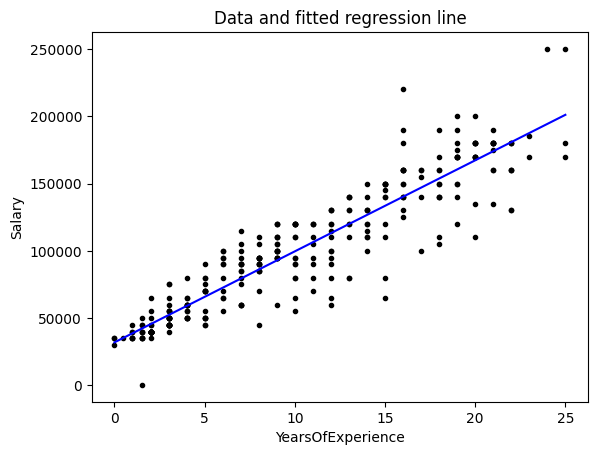

In [88]:
predictor = "YearsOfExperience"
outcome = "Salary"
data = df.copy()
results_ = results_model_salary

# Plot the data
plt.scatter(data[predictor], data[outcome], color="k", marker=".")

# Calculate the fitted values
a_hat = results_.params["Intercept"]
b_hat = results_.params[predictor]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)
fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color="b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

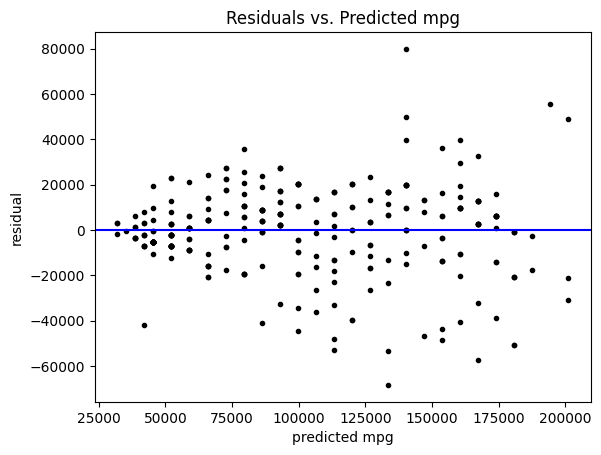

In [89]:
# Residual plot

# Residual Plot and Explained Variance
plt.scatter(results_model_salary.fittedvalues, results_model_salary.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

In [90]:
r_squared = results_model_salary.rsquared
print(f"R-squared value: {r_squared:.3f}")

R-squared value: 0.855


The residuals produce a noticeable pattern, making the mismatch more apparent even though the regression line explains more than 85% of the variance in length of work experience.

**Normality of Error Assumption**

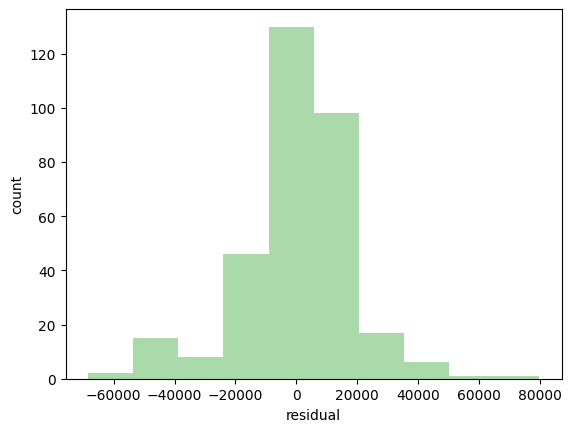

In [91]:
# Normality of Error Assumption

plt.hist(results_model_salary.resid, color='tab:green', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [92]:
### b. Fit Linear Regression - Using Log Transform on Weight Variable

df["logYOE"] = np.log(df["YearsOfExperience"])
df.loc[df["YearsOfExperience"] == 0, "logYOE"] = 0
df.describe().transpose()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.000000,31.000000,36.500000,44.000000,53.000000
Gender,324.0,0.475309,0.500162,0.000000,0.000000,0.000000,1.000000,1.000000
EducationLevel,324.0,0.540123,0.713597,0.000000,0.000000,0.000000,1.000000,2.000000
YearsOfExperience,324.0,10.058642,6.650470,0.000000,4.000000,9.000000,16.000000,25.000000
Salary,324.0,99985.648148,48652.271440,350.000000,55000.000000,95000.000000,140000.000000,250000.000000
logYOE,324.0,2.005576,0.874208,-0.693147,1.386294,2.197225,2.772589,3.218876


In [93]:
# Create OLS model object
model = smf.ols("Salary ~ logYOE", df)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary_log = print_coef_std_err(results_logtransform)
print(f"results_logtransform.rsquared : {results_logtransform.rsquared:.3f}")

results_logtransform.rsquared : 0.766


The R Squared value of linear regression with log transformation is smaller than without transformation.
The regression performance without transformation is better.

# Multiple Predictors Modelling

**Data preparation**

In [94]:
# Returns the table data
df.drop("logYOE", axis=1, inplace=True)
df.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


In [95]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None
 
    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame> 
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold, 
                  shuffle = True, 
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()
        
    return (fold_train, fold_test)

### Evaluate a model using K-fold cross validation

In [96]:
# Create a class model
ols_all_pred = StatsmodelsRegressor(smf.ols, "Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=123)

scores_ols_all_pred = cross_val_score(estimator = ols_all_pred,
                                       X = df,
                                       y = df["Salary"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred, 
                                    columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.892141,Folds 1
1,0.902729,Folds 2
2,0.912515,Folds 3
3,0.825113,Folds 4
4,0.897267,Folds 5


In [97]:
r_squared = scores_ols_all_pred["test_rsquared"].mean()
print(f"R-squared mean value: {r_squared:.3f}")

R-squared mean value: 0.886


The model use all media have good fit, it can explain 88.59% variance of salary. Let's build the model using whole data to infer the estimated coefficient from the model, and gain the insight from business perspective.

## Fit Linear Regression - Using All Predictors

In [98]:
# Create OLS model object
model = smf.ols("Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience", df)

# Fit the model
results_model_salary = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results_model_salary)
results_salary

,Coefficient,Standard Error
Intercept,-44159.185552,16580.736611
C(EducationLevel)[T.1],19574.074815,2257.344892
C(EducationLevel)[T.2],26339.473807,3160.610738
Age,3042.039143,611.919060
Gender,-9310.571777,1766.475849
YearsOfExperience,2433.641886,1211.995905
Age:YearsOfExperience,3.452762,21.044653


The intercept value is negative and therefore less meaningful.

### Centering Predictor Age

Centering is done for better interpretation of the regression results.

In [99]:
mean_age = df["Age"].mean()
mean_age = np.round(mean_age,0)
mean_age
print(f"mean age value : {mean_age}")

mean age value : 37.0


In [100]:
df["Age"] = df["Age"]-mean_age
df.rename(columns = {"Age":"AgeCentered"}, inplace=True)
df.head()

,AgeCentered,Gender,EducationLevel,YearsOfExperience,Salary
0,-5.0,0,0,5.0,90000.0
1,-9.0,1,1,3.0,65000.0
2,8.0,0,2,15.0,150000.0
3,-1.0,1,0,7.0,60000.0
4,15.0,0,1,20.0,200000.0


### Evaluate a model using K-fold cross validation again

In [101]:
# Create a class model
ols_all_pred = StatsmodelsRegressor(smf.ols, "Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + AgeCentered:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=12)

scores_ols_all_pred = cross_val_score(estimator = ols_all_pred,
                                       X = df,
                                       y = df["Salary"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred, 
                                    columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.849681,Folds 1
1,0.907836,Folds 2
2,0.873470,Folds 3
3,0.938117,Folds 4
4,0.881399,Folds 5


In [102]:
r_squared = scores_ols_all_pred["test_rsquared"].mean()
print(f"R-squared mean value: {r_squared:.3f}")

R-squared mean value: 0.890


The model use all media have good fit, it can explain 89% variance of salary. Let's build the model using whole data to infer the estimated coefficient from the model, and gain the insight from business prespective.

In [103]:
# Create OLS model object
model = smf.ols('Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + AgeCentered:YearsOfExperience', df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results)
results_salary

,Coefficient,Standard Error
Intercept,68396.262743,6722.803498
C(EducationLevel)[T.1],19574.074815,2257.344892
C(EducationLevel)[T.2],26339.473807,3160.610738
AgeCentered,3042.039143,611.919060
Gender,-9310.571777,1766.475849
YearsOfExperience,2561.394070,714.405923
AgeCentered:YearsOfExperience,3.452762,21.044653


$$\text{Salary for Bachelor's} = 68396 + 3042\times\text{(Age - 37)} - 9311\times\text{Gender} + 2561\times\text{YearsOfExperience} + 3\times\text{(Age - 37)}\times\text{YearsOfExperience} $$

$$\text{Salary for Master's} = 68396+ 19574 + 3042\times\text{(Age - 37)} - 9311\times\text{Gender} + 2561\times\text{YearsOfExperience} + 3\times\text{(Age - 37)}\times\text{YearsOfExperience} $$

$$\text{Salary for PhD} = 68396 + 26339 + 3042\times\text{(Age - 37)} - 9311\times\text{Gender} + 2561\times\text{YearsOfExperience} + 3\times\text{(Age - 37)}\times\text{YearsOfExperience} $$

**Interpretation of education level**

When comparing two people of the same age, gender, length of work experience, the salary of a person with a Master's degree is estimated to be 19574 dollars higher than the salary of a person with a Bachelor's degree.



**Age interpretation**

When comparing two people of the same gender, same level of education, and 0 years of work experience, a person 1 year older than 37 is estimated to have a higher salary of 3042 dollars than a person aged 37.



**Gender interpretation**

When comparing two people of the same age, years of work experience, and education level, a woman is estimated to have a salary 9311 dollars less than a man.


**Interpretation of years of work experience**

When comparing two 37 y.o of the same gender and education level, the person with 1 year more work experience is estimated to have a higher salary of 2561 dollars.

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

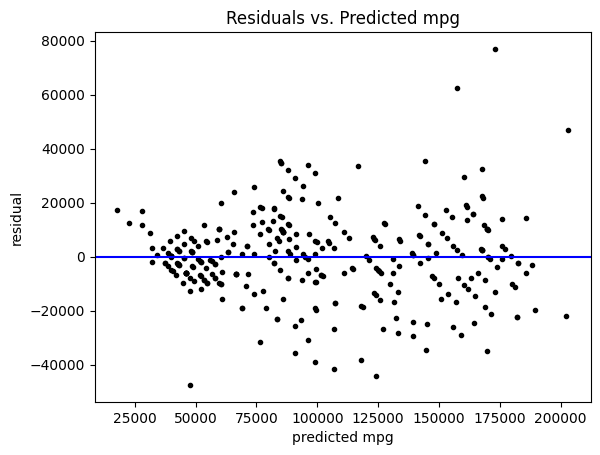

In [104]:
# Residual Plot and Explained Variance
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

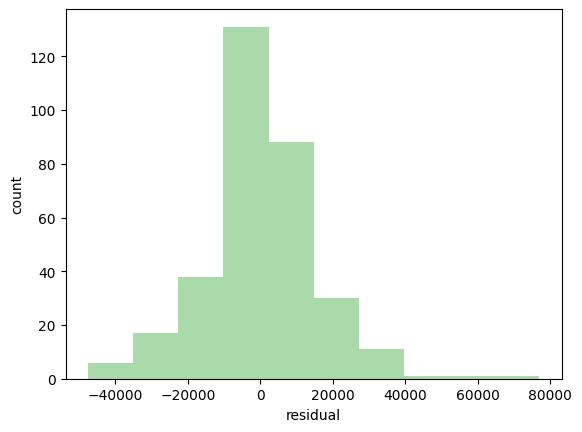

In [106]:
# Normality of Error Assumption

plt.hist(results.resid, color='tab:green', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()